In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.options.display.max_columns=999

In [105]:
train_identiy = pd.read_csv('data/train_identity.csv')
train_trans = pd.read_csv('data/train_transaction.csv')

In [3]:
print(train_identiy.shape, train_trans.shape)

(141907, 41) (590540, 394)


In [4]:
train_identiy.head(3)

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0


In [10]:
train_trans.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [106]:
train_df = train_trans.merge(train_identiy, how='left', left_index=True, right_index=True)
train_df=train_df.drop(columns='TransactionID_y').rename(columns={'TransactionID_x': 'TransactionID'})
train_df.shape

(590540, 435)

In [6]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

## Target Variable Distribution

In [7]:
train_df['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

## Data Exploration in Parts
* Non-encrpyted Transaction Data
    * TransactionDt
    * Transaction Amount
    * Product
    * Card related information
    * Address
    * Email Domain
* Encrypted Transaction Data
    * C, D, M, V
* Identity Data
    * id
    * Device Type and Info

----
## Transaction Data EDA
#### Transaction Date

In [2]:
# https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480
def convert_dt(df, START_DATE = '2017-12-01'):
    startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
    df["Date"] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
    df['_Weekdays'] = df['Date'].dt.dayofweek
    df['_Hours'] = df['Date'].dt.hour
    df['_Days'] = df['Date'].dt.day
    df.drop(columns='TransactionDT', inplace=True)
    
    return df

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def plot_category_pct(df, cat_features_lst):
    for cat in cat_features_lst:
        tmp_df = df.groupby('isFraud')[cat].value_counts(normalize=True).reset_index(name='pct')
        plt.figure()
        sns.barplot(x=cat, y='pct', hue='isFraud', data=tmp_df);
        
def PCA_w_scaler(X, threshold_by_component = True, n_components = 10, variance_sum_threshold=0.8):
    """
    Use this function to perform PCA.

    Parameters
    ----------
    X: a panda dataframe returned by function calculate_vif.

    threshold_by_component: Boolean, optional (default: True) 
        Use this variable to specific if the user wants the PCA functions to return a specific count of PC components,
        or returns PC componets that meet a specific sum of variance.

    n_componets: positive int, optional (default: 10) 
        This varibale would only be valid when user specifies True for threshold_by_component.

    variance_sum_threshold: postive num, optional(default: 0.8) 
        This variable would only be valid when user specifies False for threshold_by_component.

    Returns
    --------
    A panda dataframe with PC components.
    """
    #initiate scaler and apply scaler on input X df
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #initate PCA process by meeting variance threshold
    if threshold_by_component==False:
        pca = PCA(n_components = X_scaled.shape[1])
        pca.fit(X_scaled)
        variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
        #find the number of component needed to reach the specified threshold
        num_comp_to_reach_variance_threshold = np.where(variance_ratio_cumsum>=variance_sum_threshold)[0][0]
        
        #run PCA again with the number of component above
        pca = PCA(n_components=num_comp_to_reach_variance_threshold)
        pca.fit(X_scaled)
        return(pd.DataFrame(pca.fit_transform(X_scaled), 
                            columns=list('pc_' + pd.Series(np.arange(1, num_comp_to_reach_variance_threshold+1)).astype('str'))))


    #initiate PCA process by meeting component threshold
    elif threshold_by_component == True:
        pca = PCA(n_components=n_components)
        pca.fit(X_scaled)
        variance_sum = sum(pca.explained_variance_ratio_)
        print("The sum of variance is {:.3f}.".format(variance_sum))
        return(pd.DataFrame(pca.fit_transform(X_scaled), 
               columns=list('pc_' + pd.Series(np.arange(1, n_components+1)).astype('str'))))

In [491]:
train_df = convert_dt(train_df)

In [151]:
#time duration of the transaction data
train_df['Date'].agg({'min', 'max'})

max   2018-06-01 23:58:51
min   2017-12-02 00:00:00
Name: Date, dtype: datetime64[ns]

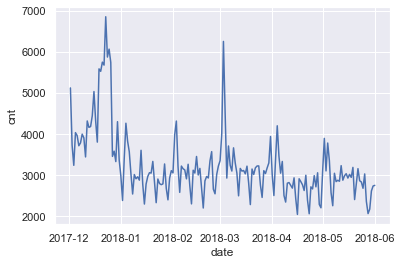

In [170]:
transaction_cnt_by_date = train_df['Date'].dt.floor('D').value_counts().reset_index(name='cnt').rename(columns={'index':'date'})
sns.lineplot(x='date', y='cnt', data=transaction_cnt_by_date);

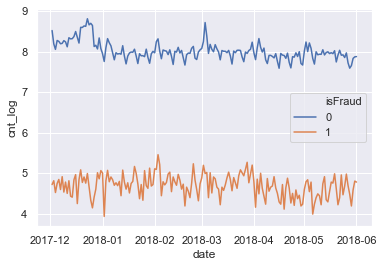

In [187]:
transaction_cnt_by_date_type = pd.DataFrame({'date':train_df['Date'].dt.floor('D'), 'isFraud': train_df['isFraud']}).groupby('isFraud')['date'].value_counts().reset_index(name='cnt')
transaction_cnt_by_date_type['cnt_log'] = np.log(transaction_cnt_by_date_type['cnt'])

sns.lineplot(x='date', y='cnt_log', hue='isFraud', data=transaction_cnt_by_date_type);

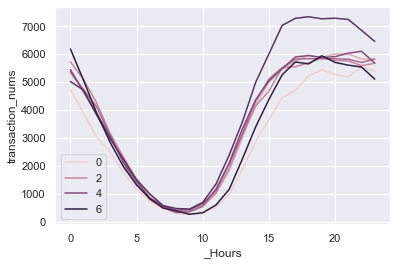

In [56]:
#trasaction count
transaction_cnt_df = train_df.groupby('_Weekdays')['_Hours'].value_counts().reset_index(name='transaction_nums')
sns.lineplot(x='_Hours', y='transaction_nums', hue='_Weekdays', data=transaction_cnt_df);

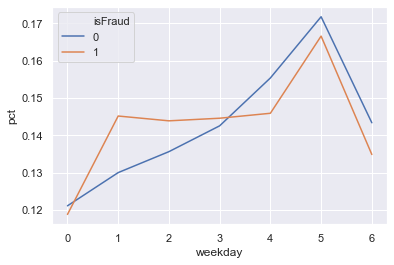

In [36]:
#fraud transaction frequency by weekday
transaction_vol_by_wkday= pd.concat([pd.DataFrame({'pct': train_df[train_df['isFraud']==1]['_Weekdays'].value_counts(normalize=True),
                                                   'isFraud': 0}).reset_index().rename(columns={'index': 'weekday'}),
                                    pd.DataFrame({'pct': train_df[train_df['isFraud']==0]['_Weekdays'].value_counts(normalize=True),
                                                   'isFraud': 1}).reset_index().rename(columns={'index': 'weekday'})
                                    ])

sns.lineplot(x='weekday', y='pct', hue='isFraud', data=transaction_vol_by_wkday);

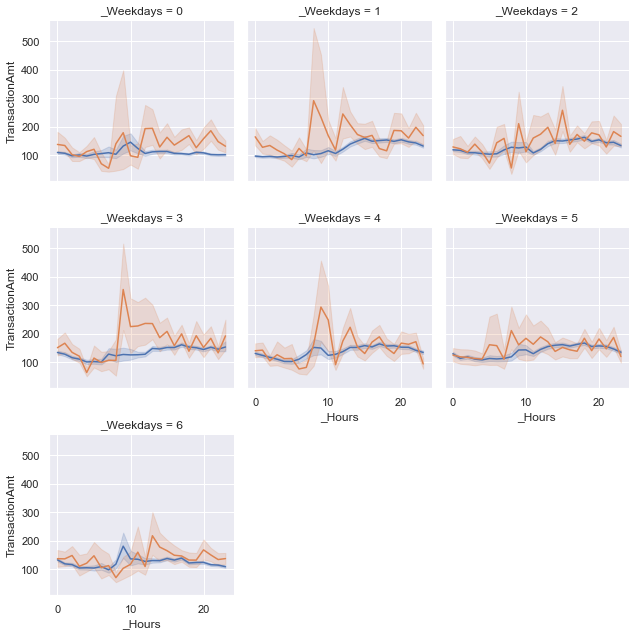

In [45]:
### the range of the fraudlent transaction seems the varry a lot
g = sns.FacetGrid(train_df, col='_Weekdays', hue='isFraud', col_wrap=3)
g.map(sns.lineplot, '_Hours', 'TransactionAmt');

In [46]:
fraud_pct_df= train_df.groupby(['_Weekdays', '_Hours'])['isFraud'].value_counts(normalize=True).reset_index(name='fraud_pct')
fraud_pct_df = fraud_pct_df[fraud_pct_df['isFraud']==0].drop(columns='isFraud')

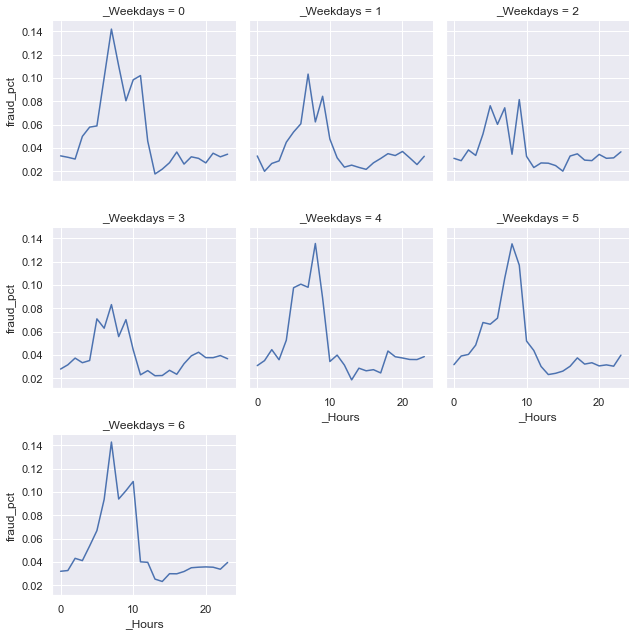

In [14]:
g = sns.FacetGrid(fraud_pct_df, col='_Weekdays', col_wrap=3)
g.map(sns.lineplot, '_Hours', 'fraud_pct');

Fraudulent transactions seem to spike during hour 1 to 10, however, it's usually that time range the trasaction count by hour dived down.

### Card information

In [503]:
train_df.loc[:, 'card1': 'card6'].head(2)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit


In [502]:
train_df.loc[:, 'card1': 'card6'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   card1   590540 non-null  int64  
 1   card2   581607 non-null  float64
 2   card3   588975 non-null  float64
 3   card4   588963 non-null  object 
 4   card5   586281 non-null  float64
 5   card6   588969 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 27.0+ MB


In [62]:
#check unique values
train_df.loc[:, 'card1': 'card6'].nunique()

card1    13553
card2      500
card3      114
card4        4
card5      119
card6        4
dtype: int64

In [66]:
#check null values
train_df.loc[:, 'card1': 'card6'].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

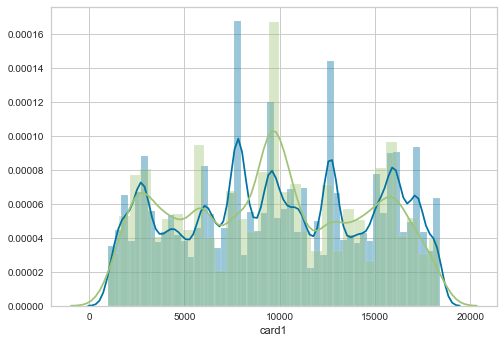

In [504]:
#card num features
sns.distplot(train_df[train_df['isFraud']==0]['card1'])
sns.distplot(train_df[train_df['isFraud']==1]['card1']);

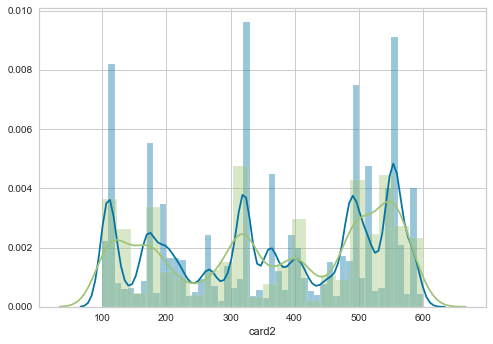

In [505]:
sns.distplot(train_df[train_df['isFraud']==0]['card2'])
sns.distplot(train_df[train_df['isFraud']==1]['card2']);

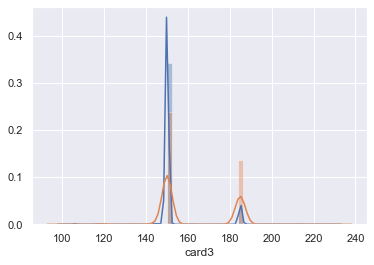

In [191]:
sns.distplot(train_df[train_df['isFraud']==0]['card3'])
sns.distplot(train_df[train_df['isFraud']==1]['card3']);

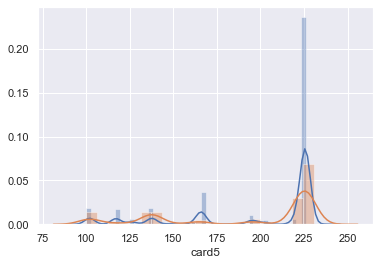

In [195]:
sns.distplot(train_df[train_df['isFraud']==0]['card5'])
sns.distplot(train_df[train_df['isFraud']==1]['card5']);

In [199]:
train_df.groupby('card4')['isFraud'].value_counts(normalize=True)

card4             isFraud
american express  0          0.971302
                  1          0.028698
discover          0          0.922718
                  1          0.077282
mastercard        0          0.965669
                  1          0.034331
visa              0          0.965244
                  1          0.034756
Name: isFraud, dtype: float64

In [201]:
train_df.groupby('card6')['isFraud'].value_counts(normalize=True)

card6            isFraud
charge card      0          1.000000
credit           0          0.933215
                 1          0.066785
debit            0          0.975737
                 1          0.024263
debit or credit  0          1.000000
Name: isFraud, dtype: float64

In [204]:
train_df.groupby(['card4', 'card6'])['isFraud'].value_counts(normalize=True).reset_index(name='pct')

,card4,card6,isFraud,pct
0,american express,charge card,0,1.000000
1,american express,credit,0,0.971376
2,american express,credit,1,0.028624
3,american express,debit,0,0.965278
4,american express,debit,1,0.034722
5,discover,credit,0,0.920685
6,discover,credit,1,0.079315
7,discover,debit,0,0.959654
8,discover,debit,1,0.040346
9,mastercard,credit,0,0.930848


In [212]:
train_df.groupby(['card4', 'card6', 'isFraud'])['TransactionAmt'].describe()

count        mean         std  \
card4            card6           isFraud                                     
american express charge card     0             3.0  133.333333   28.867513   
                 credit          0          7941.0  174.138729  164.390979   
                                 1           234.0  178.945231  108.123647   
                 debit           0           139.0  105.654676  112.207476   
                                 1             5.0  185.000000   65.192024   
discover         credit          0          5804.0  259.568742  402.497244   
                                 1           500.0  354.351180  375.782261   
                 debit           0           333.0  237.143123  428.143632   
                                 1            14.0  344.632143  250.511095   
mastercard       credit          0         47261.0  188.718409  387.364366   
                                 1          3511.0  136.144008  195.621178   
                 debit           0        135430.0  112.767684  185.584778   
                                 1          2985.0  126.545247  188.937126   
                 debit or credit 0            30.0  104.065667  105.335326   
visa             charge card     0            12.0   41.076833   38.265744   
                 credit          0         78028.0  190.279313  324.926298   
                                 1          5704.0  168.197928  252.579843   
                 debit           0        293354.0  117.233634  190.910935   
                                 1          7669.0  135.389864  230.446894   

                                              min       25%       50%  \
card4            card6           isFraud                                
american express charge card     0        100.000  125.0000  150.0000   
                 credit          0          5.000  100.0000  125.0000   
                                 1          5.000  100.0000  150.0000   
                 debit           0         10.000   40.0000   75.0000   
                                 1         75.000  200.0000  200.0000   
discover         credit          0          5.000   57.9500  117.0000   
                                 1         15.000   90.0000  226.0000   
                 debit           0         15.000   57.9500  100.0000   
                                 1         75.000  106.5000  311.9500   
mastercard       credit          0          0.272   48.2300  100.0000   
                                 1          2.231   33.5340   67.0670   
                 debit           0          0.588   39.0000   59.0000   
                                 1          0.467   30.8140   60.3990   
                 debit or credit 0         25.000   35.9500   58.7300   
visa             charge card     0         11.077   20.3470   25.7685   
                 credit          0          0.364   50.0000  100.0000   
                                 1          0.424   32.9595   79.0290   
                 debit           0          0.251   42.1730   59.0000   
                                 1          0.292   39.0000   67.9500   

                                               75%        max  
card4            card6           isFraud                       
american express charge card     0        150.0000    150.000  
                 credit          0        200.0000   1800.000  
                                 1        250.0000    500.000  
                 debit           0        150.0000   1000.000  
                                 1        200.0000    250.000  
discover         credit          0        280.0000   4817.580  
                                 1        470.0000   3133.060  
                 debit           0        226.0000   3002.070  
                                 1        492.5000    884.000  
mastercard       credit          0        200.0000  31937.391  
                                 1        150.0000   3247.160  
                 debit           0      

#### addr

In [534]:
train_df[['addr1', 'addr2']].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [536]:
train_df[['addr1', 'addr2']].describe()

,addr1,addr2
count,524834.000000,524834.000000
mean,290.733794,86.800630
std,101.741072,2.690623
min,100.000000,10.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
max,540.000000,102.000000


In [207]:
train_df[['addr1', 'addr2']].nunique()

addr1    332
addr2     74
dtype: int64

In [222]:
train_df[['addr1', 'addr2']].isnull().sum()/train_df.shape[0]

addr1    0.111264
addr2    0.111264
dtype: float64

In [550]:
train_df['addr1'].value_counts().reset_index(name='cnt').rename(columns={'index':'addr1'})['cnt'].describe()

count      332.000000
mean      1580.825301
std       5757.512421
min          1.000000
25%          1.000000
50%          3.000000
75%         21.250000
max      46335.000000
Name: cnt, dtype: float64

In [551]:
train_df['addr2'].value_counts().reset_index(name='cnt').rename(columns={'index':'addr2'})['cnt'].describe()

count        74.000000
mean       7092.351351
std       60498.851674
min           1.000000
25%           2.000000
50%           3.500000
75%           9.500000
max      520481.000000
Name: cnt, dtype: float64

In [564]:
train_df.loc[train_df.addr1.isin(train_df.addr1.value_counts()[train_df.addr1.value_counts() <= 5000].index), 'addr1'] = "Others"
train_df.loc[train_df.addr2.isin(train_df.addr2.value_counts()[train_df.addr2.value_counts() <= 50].index), 'addr2'] = "Others"

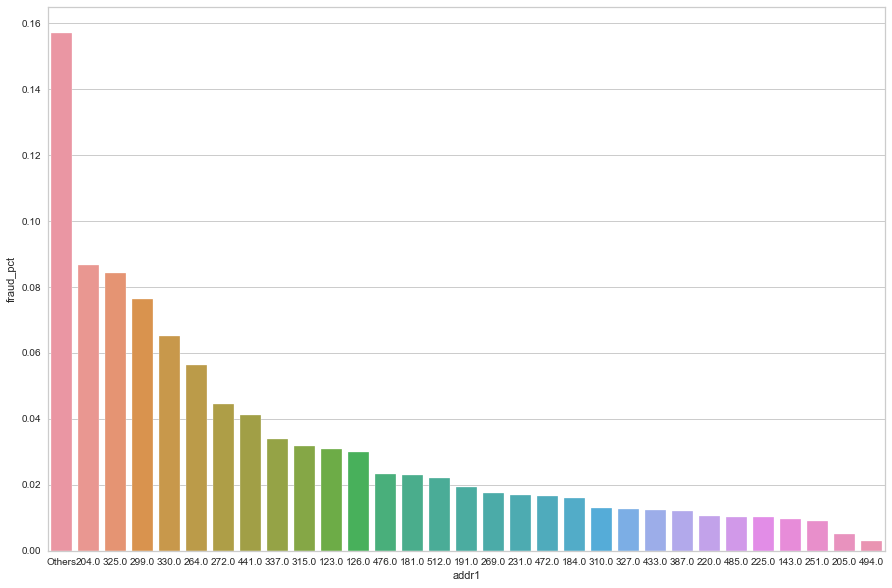

In [573]:
plt.figure(figsize=(15,10))
addr1_fraud_df = train_df.groupby('isFraud')['addr1'].value_counts(normalize=True).reset_index(name='fraud_pct')
addr1_fraud_df = addr1_fraud_df[addr1_fraud_df['isFraud']==1]
sns.barplot(x='addr1', y='fraud_pct', data=addr1_fraud_df);

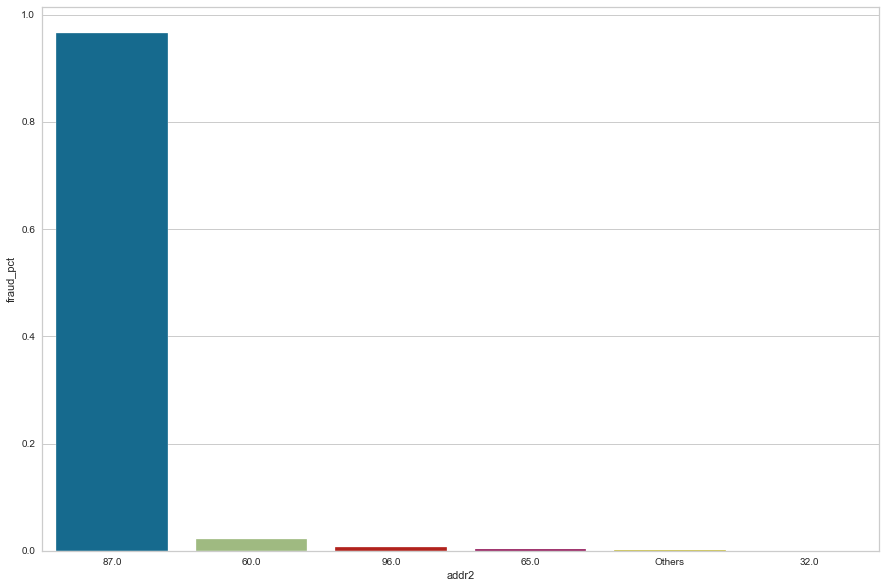

In [578]:
plt.figure(figsize=(15,10))
addr2_fraud_df = train_df.groupby('isFraud')['addr2'].value_counts(normalize=True).reset_index(name='fraud_pct')
addr2_fraud_df = addr2_fraud_df[addr2_fraud_df['isFraud']==1]
sns.barplot(x='addr2', y='fraud_pct', data=addr2_fraud_df);

#### Dist

In [218]:
train_df[['dist1', 'dist2']].nunique()

dist1    2651
dist2    1751
dtype: int64

In [220]:
train_df[['dist1', 'dist2']].isnull().sum()

dist1    352271
dist2    552913
dtype: int64

In [221]:
train_df[['dist1', 'dist2']].isnull().sum()/train_df.shape[0]

dist1    0.596524
dist2    0.936284
dtype: float64

In [357]:
train_df.drop(columns='dist2', inplace=True)

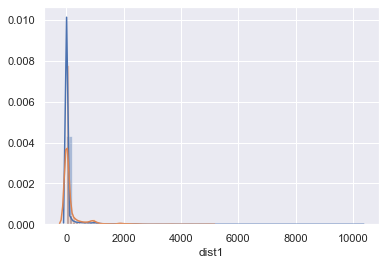

In [223]:
sns.distplot(train_df[train_df['isFraud']==0]['dist1'])
sns.distplot(train_df[train_df['isFraud']==1]['dist1']);

#### Email Domain

In [225]:
train_df[['P_emaildomain', 'R_emaildomain']].nunique()

P_emaildomain    59
R_emaildomain    60
dtype: int64

In [240]:
train_df[['P_emaildomain', 'R_emaildomain']].isnull().sum()

P_emaildomain     94456
R_emaildomain    453249
dtype: int64

In [354]:
train_df[train_df['isFraud']==1]['R_emaildomain'].isnull().sum()/len(train_df[train_df['isFraud']==1])

0.4566616657794125

In [352]:
train_df[train_df['isFraud']==0]['R_emaildomain'].isnull().sum()/len(train_df[train_df['isFraud']==0])

0.7787873523584914

In [355]:
train_df['R_emaildomain']= train_df['R_emaildomain'].fillna('unknown')
train_df['P_emaildomain']= train_df['P_emaildomain'].fillna('unknown')

In [239]:
(train_df.groupby('P_emaildomain')['isFraud'].sum()/train_df['P_emaildomain'].value_counts()).reset_index(name='fraud_pct').sort_values(by='fraud_pct', ascending=False).head(10)

,index,fraud_pct
38,protonmail.com,0.407895
29,mail.com,0.189624
36,outlook.es,0.130137
0,aim.com,0.126984
35,outlook.com,0.094584
21,hotmail.es,0.065574
26,live.com.mx,0.054740
19,hotmail.com,0.052950
16,gmail.com,0.043542
57,yahoo.fr,0.034965


In [579]:
(train_df.groupby('R_emaildomain')['isFraud'].sum()/train_df['R_emaildomain'].value_counts()).reset_index(name='fraud_pct').sort_values(by='fraud_pct', ascending=False).head(10)

,index,fraud_pct
38,protonmail.com,0.951220
29,mail.com,0.377049
33,netzero.net,0.222222
35,outlook.com,0.165138
36,outlook.es,0.131640
23,icloud.com,0.128755
16,gmail.com,0.119184
19,hotmail.com,0.077793
11,earthlink.net,0.075949
21,hotmail.es,0.068493


#### C Columns

In [242]:
train_df.loc[:, 'C1':'C14'].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [243]:
train_df.loc[:, 'C1':'C14'].isnull().sum()

C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
dtype: int64

In [308]:
train_df.loc[:, 'C1':'C14'].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [331]:
tmp = list(train_df.loc[:, 'C1':'C14'].columns.values)
tmp.extend(['isFraud'])

In [336]:
train_df[tmp].groupby('isFraud').agg({'mean','median'})

C1                C2                C3               C4  \
        median       mean median       mean median      mean median   
isFraud                                                               
0          1.0  13.314952    1.0  14.173283    0.0  0.005840    0.0   
1          2.0  35.535740    2.0  45.509413    0.0  0.000242    1.0   

                       C5               C6                C7             \
              mean median      mean median       mean median       mean   
isFraud                                                                   
0         3.693878    0.0  5.722537    1.0   8.786377    0.0   2.517484   
1        15.077336    0.0  1.406717    1.0  16.923148    0.0  11.977157   

            C8                C9              C10               C11  \
        median       mean median      mean median       mean median   
isFraud                                                               
0          0.0   4.560881    1.0  4.580904    0.0   4.723526    1.0   
1          1.0  21.242608    0.0  1.703964    1.0  19.493926    2.0   

                      C12               C13               C14             
              mean median       mean median       mean median       mean  
isFraud                                                                   
0         9.747825    0.0   3.549703    3.0  32.814474    1.0   8.220491  
1        23.857475    0.0  18.597541    1.0  24.967768    1.0  10.356047

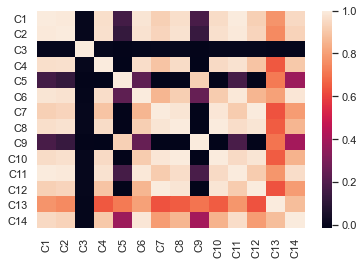

In [253]:
sns.heatmap(train_df.loc[:, 'C1':'C14'].corr());

In [582]:
train_df['C1'].describe()

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64

In [583]:
train_df.loc[train_df.C1.isin(train_df.C1\
                              .value_counts()[train_df.C1.value_counts() <= 400 ]\
                              .index), 'C1'] = "Others"

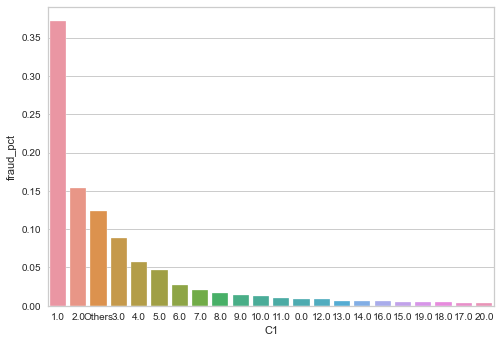

In [593]:
_df = train_df.groupby('isFraud')['C1'].value_counts(normalize=True).reset_index(name='fraud_pct')
_df = _df[_df.isFraud==1]
sns.barplot(x='C1', y='fraud_pct',data= _df);

In [594]:
train_df['C2'].describe()

count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64

In [595]:
154*3

462

In [596]:
train_df.loc[train_df.C2.isin(train_df.C2\
                              .value_counts()[train_df.C2.value_counts() <= 450 ]\
                              .index), 'C2'] = "Others"

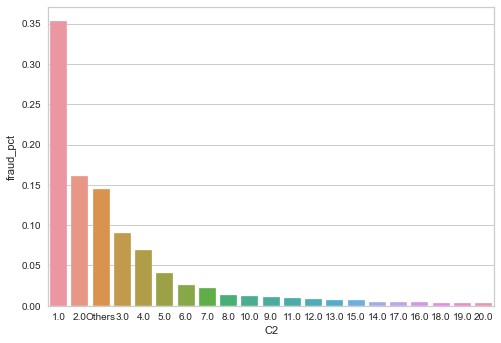

In [597]:
_df = train_df.groupby('isFraud')['C2'].value_counts(normalize=True).reset_index(name='fraud_pct')
_df = _df[_df.isFraud==1]
sns.barplot(x='C2', y='fraud_pct',data= _df);

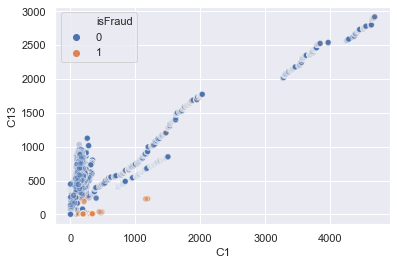

In [254]:
sns.scatterplot(x='C1', y='C13', hue='isFraud', data=train_df, alpha=0.3);

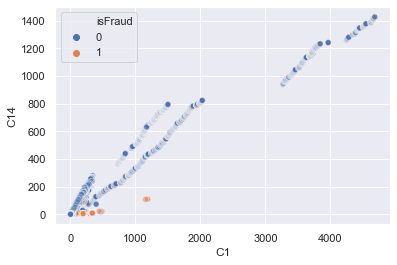

In [256]:
sns.scatterplot(x='C1', y='C14', hue='isFraud', data=train_df, alpha=0.3);

In [301]:
from sklearn.manifold import TSNE

In [302]:
tsne = TSNE(n_components= 2, verbose= 1, perplexity=50, n_iter=1000, method = 'barnes_hut')
tsne_results = tsne.fit_transform(train_df.loc[:, 'C1':'C14'])
tsne_results_df = pd.DataFrame(tsne_results, columns = ['tsne_x', 'tsne_y'])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 590540 samples in 934.324s...
[t-SNE] Computed neighbors for 590540 samples in 1315.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 590540
[t-SNE] Computed conditional probabilities for sample 2000 / 590540
[t-SNE] Computed conditional probabilities for sample 3000 / 590540
[t-SNE] Computed conditional probabilities for sample 4000 / 590540
[t-SNE] Computed conditional probabilities for sample 5000 / 590540
[t-SNE] Computed conditional probabilities for sample 6000 / 590540
[t-SNE] Computed conditional probabilities for sample 7000 / 590540
[t-SNE] Computed conditional probabilities for sample 8000 / 590540
[t-SNE] Computed conditional probabilities for sample 9000 / 590540
[t-SNE] Computed conditional probabilities for sample 10000 / 590540
[t-SNE] Computed conditional probabilities for sample 11000 / 590540
[t-SNE] Computed conditional probabilities for sample 12000 / 590540
[t-SNE] Computed conditional p

In [303]:
tsne_results_df.head()

,tsne_x,tsne_y
0,16.414804,25.340530
1,12.751925,-6.890735
2,13.087344,8.434559
3,3.539189,9.787593
4,-2.981638,-17.212299


In [304]:
tsne_results_df['isFraud']=train_df['isFraud']

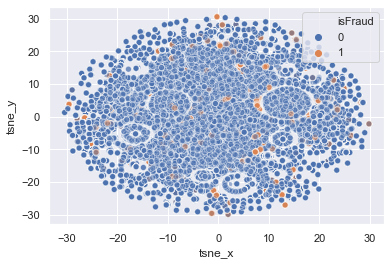

In [307]:
sns.scatterplot(x='tsne_x', y='tsne_y', hue='isFraud', data=tsne_results_df, alpha=0.5);

#### D Columns

In [340]:
d_cols_df = train_df.loc[:, 'D1':'D15'].fillna(0)

In [341]:
d_cols_df.nunique()

D1       641
D2       641
D3       649
D4       808
D5       688
D6       829
D7       597
D8     12353
D9        24
D10      818
D11      676
D12      635
D13      577
D14      802
D15      859
dtype: int64

In [343]:
train_df.loc[:, 'D1':'D15'].isnull().sum()/train_df.shape[0]

D1     0.002149
D2     0.475492
D3     0.445149
D4     0.286047
D5     0.524674
D6     0.876068
D7     0.934099
D8     0.873123
D9     0.873123
D10    0.128733
D11    0.472935
D12    0.890410
D13    0.895093
D14    0.894695
D15    0.150901
dtype: float64

In [600]:
train_df.loc[:, 'D1':'D15'].describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,94.144827,88.937285,15.726349,99.955209,20.123384,8.651185,2.744036,18.531428,0.071185,108.021541,77.279051,5.921948,1.877978,6.078691,139.035379
std,157.551484,153.823451,48.557362,173.421595,64.900349,55.561666,27.610524,95.772821,0.218201,175.440514,153.627465,44.468349,22.576330,47.650790,195.785107
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
75%,121.000000,109.000000,11.000000,123.000000,8.000000,0.000000,0.000000,0.000000,0.000000,150.000000,57.000000,0.000000,0.000000,0.000000,251.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000


In [364]:
train_df.loc[:, 'D1':'D15'] = train_df.loc[:, 'D1':'D15'].fillna(0)

#### M Columns

In [375]:
train_df.loc[:, 'M1':'M9'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   M1      319440 non-null  object
 1   M2      319440 non-null  object
 2   M3      319440 non-null  object
 3   M4      309096 non-null  object
 4   M5      240058 non-null  object
 5   M6      421180 non-null  object
 6   M7      244275 non-null  object
 7   M8      244288 non-null  object
 8   M9      244288 non-null  object
dtypes: object(9)
memory usage: 40.5+ MB


In [385]:
#replace missing value for unknown
train_df.loc[:, 'M1':'M9'] =train_df.loc[:, 'M1':'M9'].fillna('unknown')

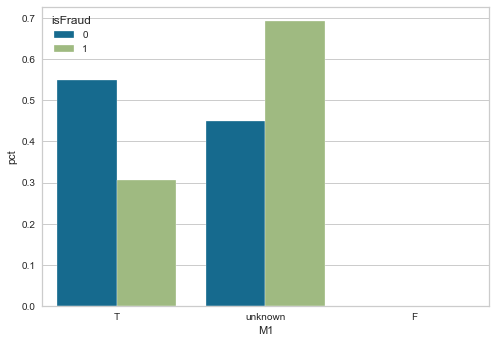

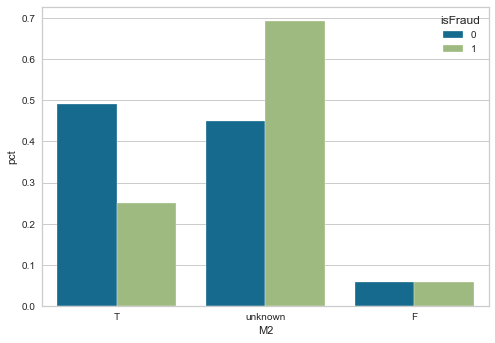

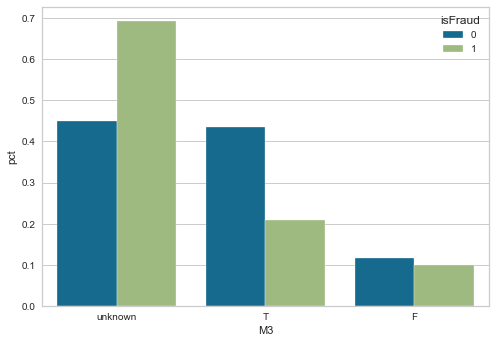

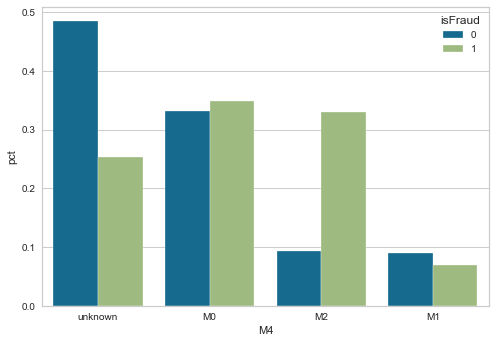

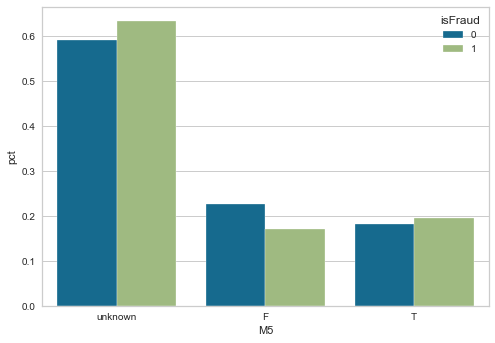

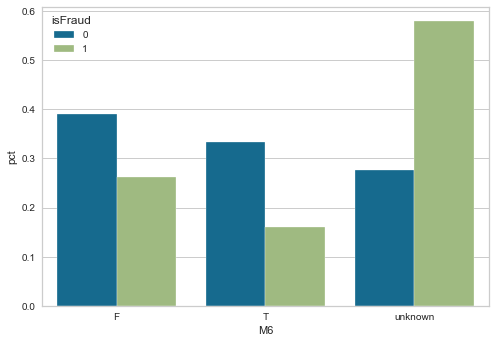

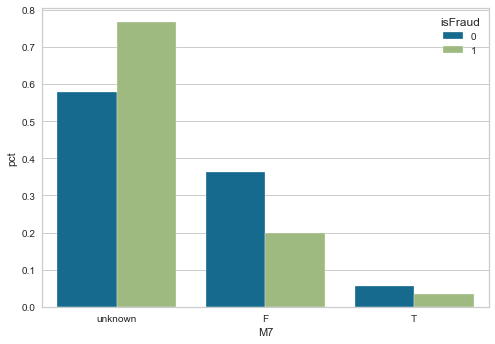

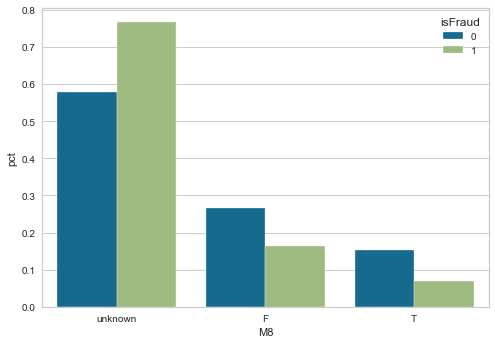

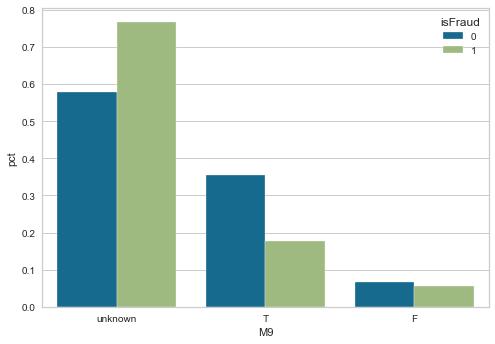

In [531]:
plot_category_pct(train_df, list(train_df.loc[:, 'M1':'M9'].columns.values))

#### V Columns

In [403]:
train_df.loc[:, 'V1': 'V339'] = train_df.loc[:, 'V1': 'V339'].fillna(-1)

In [500]:
train_df['id-30'].value_counts()

Windows 10          21015
Windows 7           10368
iOS 12.1.0           6349
iOS 11.4.1           3538
Mac OS X 10_13_6     3254
                    ...  
func                   11
Mac OS X 10_12          8
Android 4.4.2           4
other                   4
Windows                 3
Name: id-30, Length: 86, dtype: int64

#### ID columns

In [603]:
#ID 30
train_df.loc[train_df['id-30'].str.contains('Windows', na=False), 'id-30'] = 'Windows'
train_df.loc[train_df['id-30'].str.contains('iOS', na=False), 'id-30'] = 'iOS'
train_df.loc[train_df['id-30'].str.contains('Mac OS', na=False), 'id-30'] = 'Mac'
train_df.loc[train_df['id-30'].str.contains('Android', na=False), 'id-30'] = 'Android'
train_df['id-30'].fillna("NAN", inplace=True)

#ID 31
train_df.loc[train_df['id-31'].str.contains('chrome', na=False), 'id-31'] = 'Chrome'
train_df.loc[train_df['id-31'].str.contains('firefox', na=False), 'id-31'] = 'Firefox'
train_df.loc[train_df['id-31'].str.contains('safari', na=False), 'id-31'] = 'Safari'
train_df.loc[train_df['id-31'].str.contains('edge', na=False), 'id-31'] = 'Edge'
train_df.loc[train_df['id-31'].str.contains('ie', na=False), 'id-31'] = 'IE'
train_df.loc[train_df['id-31'].str.contains('samsung', na=False), 'id-31'] = 'Samsung'
train_df.loc[train_df['id-31'].str.contains('opera', na=False), 'id-31'] = 'Opera'
train_df['id-31'].fillna("NAN", inplace=True)
train_df.loc[train_df['id-31'].isin(train_df['id-31'].value_counts()[train_df['id-31'].value_counts() < 200].index), 'id-31'] = "Others"

In [607]:
pwd

'G:\\My Drive\\my own projects\\Kaggle\\fraud detection\\ieee-fraud-detection'

### Pycaret Baseline

In [64]:
train_identiy = pd.read_csv('G:/My Drive/my own projects/Kaggle/fraud detection/ieee-fraud-detection/data/train_identity.csv')
train_trans = pd.read_csv('G:/My Drive/my own projects/Kaggle/fraud detection/ieee-fraud-detection/data/train_transaction.csv')

test_identity = pd.read_csv('G:/My Drive/my own projects/Kaggle/fraud detection/ieee-fraud-detection/data/test_identity.csv')
test_trans = pd.read_csv('G:/My Drive/my own projects/Kaggle/fraud detection/ieee-fraud-detection/data/test_transaction.csv')

In [65]:
train_df= train_trans.merge(train_identiy, how='left', left_index=True, right_index=True, on='TransactionID')
test_df= test_trans.merge(test_identity, how='left', left_index=True, right_index=True, on='TransactionID')

In [66]:
del train_identiy, train_trans, test_identity, test_trans

In [611]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to 645.97 Mb (67.0% reduction)
Mem. usage decreased to 561.50 Mb (66.5% reduction)


In [67]:
test_df.columns = test_df.columns.map(lambda x: x.replace('-', '_')).values

In [68]:
train_df['type']='train'
test_df['type']='test'

tmp_df = pd.concat([train_df, test_df], axis=0)

In [69]:
#eamil mapping
#https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499#latest-579654

emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 
          'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft',
          'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 
          'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink',
          'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other',
          'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 
          'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 
          'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo',
          'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft',
          'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 
          'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 
          'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 
          'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 
          'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other',
          'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}

us_emails = ['gmail', 'net', 'edu']


for c in ['P_emaildomain', 'R_emaildomain']:
    tmp_df[c + '_bin'] = tmp_df[c].map(emails)
    tmp_df[c + '_bin'] = tmp_df[c].map(emails)
    
    tmp_df[c + '_suffix'] = tmp_df[c].map(lambda x: str(x).split('.')[-1])
    tmp_df[c + '_suffix'] = tmp_df[c].map(lambda x: str(x).split('.')[-1])
    
    tmp_df[c + '_suffix'] = tmp_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    tmp_df[c + '_suffix'] = tmp_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [70]:
#ID 30
tmp_df.loc[tmp_df['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
tmp_df.loc[tmp_df['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
tmp_df.loc[tmp_df['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
tmp_df.loc[tmp_df['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
tmp_df['id_30'].fillna("NAN", inplace=True)

#ID 31
tmp_df.loc[tmp_df['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
tmp_df.loc[tmp_df['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
tmp_df.loc[tmp_df['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
tmp_df.loc[tmp_df['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
tmp_df.loc[tmp_df['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
tmp_df.loc[tmp_df['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
tmp_df.loc[tmp_df['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
tmp_df['id_31'].fillna("NAN", inplace=True)
tmp_df.loc[tmp_df['id_31'].isin(tmp_df['id_31'].value_counts()[tmp_df['id_31'].value_counts() < 200].index), 'id_31'] = "Others"

In [71]:
#loging the target variable
tmp_df['TransactionAmt'] = np.log(tmp_df['TransactionAmt'])

In [74]:
#dimensionality reduction for V columns
pc_df = PCA_w_scaler(tmp_df.loc[:, 'V1':'V339'].fillna(0), n_components=40)

The sum of variance is 0.862.


In [75]:
to_drop_lst = list(tmp_df.loc[:, 'V1':'V339'].columns.values)
tmp_df = tmp_df.drop(columns=to_drop_lst)

In [76]:
#concat PC df
tmp_df = tmp_df.reset_index(drop=True).merge(pc_df, left_index=True, right_index=True)

In [77]:
train_df = tmp_df[tmp_df['type']=='train'].drop(columns='type').reset_index(drop=True)
test_df = tmp_df[tmp_df['type']=='test'].drop(columns=['type', 'isFraud']).reset_index(drop=True)

del tmp_df

In [713]:
# train_df = reduce_mem_usage(train_df)
# test_df = reduce_mem_usage(test_df)

Mem. usage decreased to 278.21 Mb (14.8% reduction)
Mem. usage decreased to 237.74 Mb (14.0% reduction)


In [84]:
train_df.to_csv('train_df_ready_to_model.csv', index=False)
test_df.to_csv('test_df_ready_to_model.csv', index=False)

In [3]:
train_df = pd.read_csv('train_df_ready_to_model.csv')
test_df = pd.read_csv('test_df_ready_to_model.csv')

C:\Users\lixi8003\AppData\Local\Continuum\anaconda3\envs\pycaret_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (66,69,70,77,81,82,83,87,88,89,90,91,92,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\lixi8003\AppData\Local\Continuum\anaconda3\envs\pycaret_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (65,68,69,76,80,81,82,86,87,88,89,90,91,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [406]:
# pycaret_df = train_df.loc[:, 'isFraud': 'V339']
# pycaret_df['_Weekdays'] = train_df['_Weekdays']
# pycaret_df['_Hours'] = train_df['_Hours']
# pycaret_df['_Days'] = train_df['_Days']

In [4]:
from pycaret.classification import *

In [35]:
train_df['isFraud'] = train_df['isFraud'].astype(int)
sampled_df = pd.concat([train_df[train_df['isFraud']==1],
                        train_df[train_df['isFraud']==0].sample(40000, replace=True, random_state=123)])

In [41]:
# X = train_df.drop(columns='isFraud')
# y = train_df['isFraud']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.7, random_state=123)

# df = X_train.copy()
# df['isFraud'] = y_train.copy()

data = sampled_df.sample(frac=0.8, random_state=123)
data_unseen = sampled_df.drop(sampled_df.index)

In [43]:
baseline01 = setup(data = data, target = 'isFraud',
                   ignore_features=['TransactionDT', 'TransactionID'],
                   normalize = True, transformation=True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.90
                   )
                  #high_cardinality_features= ['ProductCD', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
                  #remove_multicollinearity = True, multicollinearity_threshold = 0.90)

Setup Succesfully Completed!


,Description,Value
0,session_id,5549
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(48530, 139)"
4,Missing Values,True
5,Numeric Features,96
6,Categorical Features,42
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
#models()

In [45]:
compare_models(whitelist=['lr', 'rf', 'et', 'ada', 'gbc', 'xgboost', 'lightgbm', 'catboost', 'mlp'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8741,0.9298,0.7388,0.8706,0.7993,0.7085,0.7136,36.8018
1,Extra Trees Classifier,0.8740,0.9217,0.7332,0.8752,0.7979,0.7074,0.7133,7.0325
2,Light Gradient Boosting Machine,0.8662,0.9230,0.7305,0.8541,0.7874,0.6907,0.6952,3.1311
3,Random Forest Classifier,0.8439,0.8911,0.6714,0.8362,0.7447,0.6342,0.6422,0.6350
4,MLP Classifier,0.8364,0.8835,0.7541,0.7618,0.7577,0.6343,0.6345,286.5441
5,Gradient Boosting Classifier,0.8356,0.8888,0.6521,0.8268,0.7291,0.6134,0.6224,49.1718
6,Extreme Gradient Boosting,0.8351,0.8884,0.6463,0.8299,0.7266,0.6111,0.6210,11.5283
7,Logistic Regression,0.8170,0.8679,0.6273,0.7902,0.6993,0.5703,0.5782,2.6996
8,Ada Boost Classifier,0.8145,0.8659,0.6304,0.7807,0.6975,0.5660,0.5727,13.1969


In [46]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8772,0.9243,0.7283,0.8897,0.8010,0.7135,0.7210
1,0.8743,0.9283,0.7300,0.8788,0.7975,0.7075,0.7139
2,0.8849,0.9310,0.7622,0.8824,0.8179,0.7344,0.7386
3,0.8690,0.9169,0.7266,0.8656,0.7900,0.6959,0.7015
4,0.8714,0.9208,0.7274,0.8720,0.7932,0.7009,0.7070
5,0.8664,0.9175,0.7300,0.8547,0.7875,0.6909,0.6954
6,0.8781,0.9274,0.7387,0.8828,0.8043,0.7169,0.7229
7,0.8699,0.9091,0.7285,0.8669,0.7917,0.6981,0.7037
8,0.8664,0.9179,0.7207,0.8629,0.7854,0.6895,0.6954
9,0.8825,0.9240,0.7398,0.8960,0.8105,0.7265,0.7335


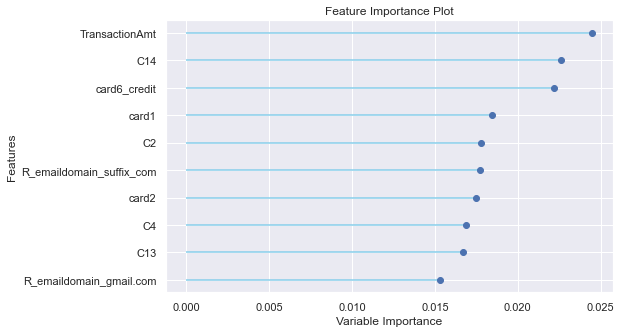

In [47]:
plot_model(et, 'feature')

In [48]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8766,0.9255,0.7331,0.8832,0.8012,0.7128,0.7193


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C2,...,R_emaildomain_bin_apple,R_emaildomain_bin_att,R_emaildomain_bin_microsoft,R_emaildomain_suffix_com,R_emaildomain_suffix_de,R_emaildomain_suffix_es,R_emaildomain_suffix_us,isFraud,Label,Score
0,-0.428121,-0.133205,-1.513192,-0.330409,0.769460,-2.003841,0.081042,0.457856,0.150671,-0.341602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.33
1,2.313778,-1.105025,1.331530,-0.330409,-0.662280,1.489105,0.081042,0.457856,0.150671,0.825069,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.00
2,-0.669167,-0.675160,-1.011434,-0.330409,-1.521168,0.477911,0.081042,-1.548288,0.150671,-0.341602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.09
3,2.809881,1.584219,1.070899,-0.330409,0.769460,-1.139101,0.081042,-1.416371,0.150671,-0.112377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.86
4,-1.424951,-0.672297,-0.229896,1.742885,0.769460,0.073397,-0.182632,0.457856,-0.878189,-0.341602,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14555,-0.235862,-1.547136,-0.116712,-0.330409,0.769460,-0.148991,0.081042,0.457856,0.150671,-0.341602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.41
14556,-0.756319,0.229546,-1.543908,-0.330409,0.769460,-1.268581,0.081042,-0.722351,0.150671,-0.112377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.23
14557,2.308804,-1.473650,-0.316106,-0.330409,-1.626208,0.477911,0.081042,-1.438088,0.150671,-0.586926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.99
14558,0.930651,-0.537684,0.145232,-0.330409,-1.560229,-0.972911,0.081042,0.457856,0.150671,-0.586926,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.19
